In [1]:
import datetime
import os
import tempfile

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
# import plotly.graph_objects as go
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow import keras

# from tensorflow.keras.callbacks import TensorBoard
# from keras import models
# from keras import layers
# from keras import optimizers
# from keras import losses
# from keras import metrics
# from keras import initializers

mpl.rcParams['figure.figsize'] = (20, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']


In [2]:
# %keras.callbacks.tensorboard --logdir logs/fit

In [3]:
df = pd.read_excel('recoded data for AI only.xlsx')
df.shape

(118357, 50)

In [4]:
df.columns

Index(['age', 'zip_code', 'number', 'sexmale', 'sexfemale', 'racewhite',
       'raceblack', 'racehispanic', 'raceother', 'maritalsingle',
       'maritalmarried', 'maritaldivorced', 'maritalother', 'languageenglish',
       'languagespanish', 'languageother', 'smokecurrent', 'smokeformer',
       'smokernever', 'smokerunknow', 'insuranceyes', 'insuranceno', 'pcpyes',
       'pcpno', 'meds0', 'meds1to2', 'meds3to5', 'meds6to10', 'meds11above',
       'lastvsnormal', 'lastvsabnormal', 'dispodischarge', 'dispoadmit',
       'dispopsy', 'dispoincomplete', 'dispoothers', 'hospyes', 'hospno',
       'readmityes', 'readmitno', 'returnyes', 'returnno', 'hityes', 'hitno',
       'overallhityes', 'overallhitno', 'mmno', 'mmone', 'mmtwoabove',
       'smokermissing'],
      dtype='object')

In [5]:
used_chart = df.hityes.sum()
print("% used HIT: " + str(used_chart/118357*100))
not_used_chart = 118357 - used_chart
print("% did not use HIT: " + str(not_used_chart/118357*100))
print(" ")
print("% used HIT and speak Spanish: " + str(df[(df['languagespanish'] == 1) & (df['hityes'] == 1)]['hityes'].sum() / used_chart * 100) + '   |   ' + 
'total % speak Spanish: ' + str(df['languagespanish'].sum() / 118357 * 100))
print("% used HIT and speak English: " + str(df[(df['languageenglish'] == 1) & (df['hityes'] == 1)]['hityes'].sum() / used_chart * 100) + '   |   ' + 
'total % speak English: ' + str(df['languageenglish'].sum() / 118357 * 100))
print("% used HIT and speak Other: " + str(df[(df['languageother'] == 1) & (df['hityes'] == 1)]['hityes'].sum() / used_chart * 100) + '     |   ' + 
'total % speak Other: ' + str(df['languageother'].sum() / 118357 * 100))

% used HIT: 9.832962984867816
% did not use HIT: 90.1670370151322
 
% used HIT and speak Spanish: 7.123217047602681   |   total % speak Spanish: 13.572496768251982
% used HIT and speak English: 87.50644440625537   |   total % speak English: 82.57052814789155
% used HIT and speak Other: 5.370338546141949     |   total % speak Other: 3.8569750838564683


In [6]:
#clean table 
# any columns that are yes or no are redundant
# the yes column being 1 or 0 contains all the information
# so change yes column title to just column, and delete no column
df.drop(columns=['sexfemale','insuranceno', 'pcpno', 'hospno', 'readmitno', 'returnno', 'hitno', 'overallhitno'], inplace=True)

df.columns

Index(['age', 'zip_code', 'number', 'sexmale', 'racewhite', 'raceblack',
       'racehispanic', 'raceother', 'maritalsingle', 'maritalmarried',
       'maritaldivorced', 'maritalother', 'languageenglish', 'languagespanish',
       'languageother', 'smokecurrent', 'smokeformer', 'smokernever',
       'smokerunknow', 'insuranceyes', 'pcpyes', 'meds0', 'meds1to2',
       'meds3to5', 'meds6to10', 'meds11above', 'lastvsnormal',
       'lastvsabnormal', 'dispodischarge', 'dispoadmit', 'dispopsy',
       'dispoincomplete', 'dispoothers', 'hospyes', 'readmityes', 'returnyes',
       'hityes', 'overallhityes', 'mmno', 'mmone', 'mmtwoabove',
       'smokermissing'],
      dtype='object')

In [7]:
# drop columns not used in the feature set
df_X = df.drop(columns=['hityes', 'overallhityes', 'number', 'zip_code']).copy()
#df_X['age'] = df_X['age'] / df_X['age'].max()
# make label df
df_y = df[['hityes', 'overallhityes']]

#normalize age
df_X['age'] = (df_X['age'] - df_X['age'].mean()) / df_X['age'].std() 

df_X.columns

Index(['age', 'sexmale', 'racewhite', 'raceblack', 'racehispanic', 'raceother',
       'maritalsingle', 'maritalmarried', 'maritaldivorced', 'maritalother',
       'languageenglish', 'languagespanish', 'languageother', 'smokecurrent',
       'smokeformer', 'smokernever', 'smokerunknow', 'insuranceyes', 'pcpyes',
       'meds0', 'meds1to2', 'meds3to5', 'meds6to10', 'meds11above',
       'lastvsnormal', 'lastvsabnormal', 'dispodischarge', 'dispoadmit',
       'dispopsy', 'dispoincomplete', 'dispoothers', 'hospyes', 'readmityes',
       'returnyes', 'mmno', 'mmone', 'mmtwoabove', 'smokermissing'],
      dtype='object')

In [8]:
# X_train, X_test, y_train, y_test = train_test_split(df_X.values, df_y['hityes'].values, random_state=42)

# Use a utility from sklearn to split and shuffle your dataset.
train_features, test_features, train_labels, test_labels = train_test_split(df_X.values, df_y['hityes'].values, test_size=0.2)
train_features, val_features, train_labels, val_labels = train_test_split(train_features, train_labels, test_size=0.2)

# Form np arrays of labels and features.
#train_labels = np.array(train_df.pop('Class'))
bool_train_labels = train_labels != 0
# val_labels = np.array(val_df.pop('Class'))
# test_labels = np.array(test_df.pop('Class'))

# train_features = np.array(train_df)
# val_features = np.array(val_df)
# test_features = np.array(test_df)


# DL Keras trial

https://www.tensorflow.org/tutorials/structured_data/imbalanced_data

Tried optimizer RMSprop, and Ftrl, both worse than Adam

In [9]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prec_rec', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(
          16, activation='relu'),
       # keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  # model.compile(
  #     optimizer=keras.optimizers.RMSprop(),
  #     loss=keras.losses.BinaryCrossentropy(),
  #     metrics=metrics)

    # model.compile(
    #   optimizer=keras.optimizers.Ftrl(),
    #   loss=keras.losses.BinaryCrossentropy(),
    #   metrics=metrics)


  model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=metrics)

  return model

In [10]:
EPOCHS = 100
BATCH_SIZE = 1000

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)


In [11]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                624       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 913
Trainable params: 913
Non-trainable params: 0
_________________________________________________________________


In [12]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("loss: {:0.4f}".format(results[0]))

loss: 1.3857


In [13]:
#plt.hist(y_train)

#df_y.groupby('hityes').count()

neg, pos = np.bincount(df_y['hityes'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

initial_bias = np.log([pos/neg])

Examples:
    Total: 118357
    Positive: 11638 (9.83% of total)



In [14]:
model = make_model(output_bias = initial_bias)
model.predict(train_features[:10])

array([[0.10387224],
       [0.10641333],
       [0.10291311],
       [0.10652015],
       [0.09684795],
       [0.11000976],
       [0.11908066],
       [0.11525121],
       [0.08975917],
       [0.10922131]], dtype=float32)

In [15]:
# show the reduction in loss just by adding a bias feature based on label occurrence
results = model.evaluate(train_features, train_labels, batch_size = BATCH_SIZE, verbose=0)
print("loss: {:0.4f}".format(results[0]))

loss: 0.3197


In [16]:
# keep initial model weights in a checkpoint file
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

### Confirm the bias fix above works

In [17]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0]) #take the last layer and assign bias of 0.0
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [18]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)


In [19]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')


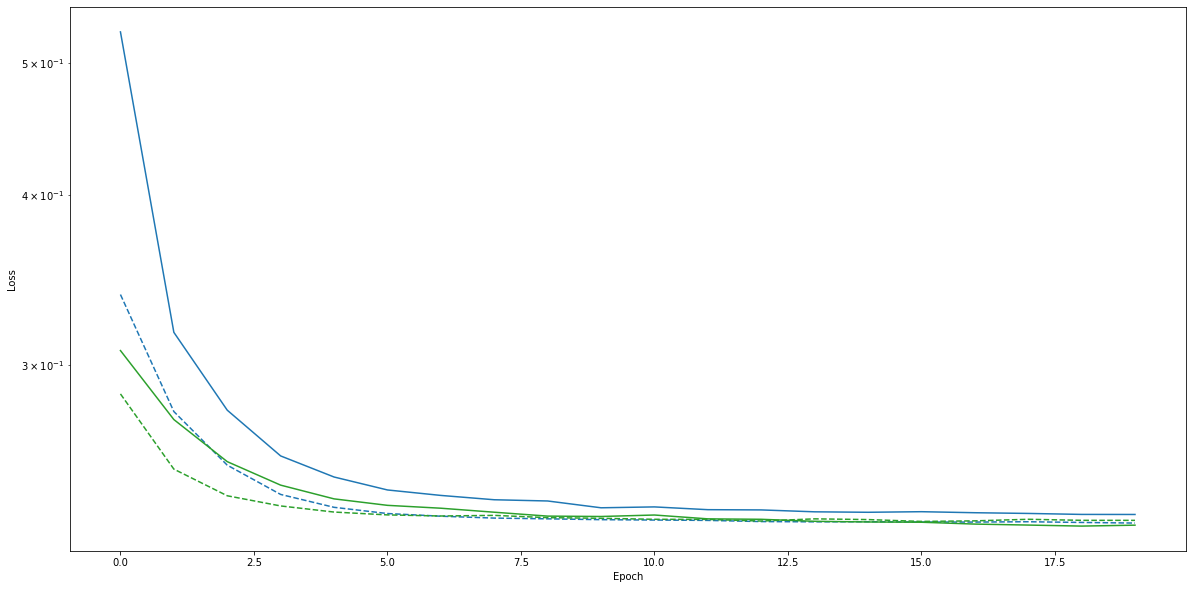

In [20]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 2)
# with initial bias loss starts lower, although the val loss equals out after 17 epochs
# example data does not even out

### Plotting Functions

In [21]:
def plot_metrics(history):
  metrics = ['loss', 'prec_rec', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend();


In [22]:
# plot of confusion matrix (false pos, true pos etc)
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('No HIT Used Correct Prediction (True Negatives): ', cm[0][0])
  print('No HIT Used Incorrectly Predicted as Used (False Positives): ', cm[0][1])
  print('HIT Used Missed (False Negatives): ', cm[1][0])
  print('HIT Used Correct Prediction (True Positives): ', cm[1][1])
  print('Total HIT Used: ', np.sum(cm[1]))


In [23]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,60])
  plt.ylim([60,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')


In [24]:
def plot_prc(name, labels, predictions, **kwargs):
    precision, recall, _ = sklearn.metrics.precision_recall_curve(labels, predictions)

    plt.plot(precision, recall, label=name, linewidth=2, **kwargs)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')


## Baseline biased model (imbalanced training data)

In [25]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    #callbacks=[early_stopping],
    validation_data=(val_features, val_labels))


Epoch 1/100
76/76 [==============================] - 1s 13ms/step - loss: 0.3073 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 85354.0000 - fn: 9331.0000 - accuracy: 0.9015 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7321 - prec_rec: 0.2358 - val_loss: 0.2855 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 17039.0000 - val_fn: 1898.0000 - val_accuracy: 0.8998 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8254 - val_prec_rec: 0.2970
Epoch 2/100
76/76 [==============================] - 0s 2ms/step - loss: 0.2732 - tp: 12.0000 - fp: 15.0000 - tn: 68300.0000 - fn: 7421.0000 - accuracy: 0.9018 - precision: 0.4444 - recall: 0.0016 - auc: 0.7918 - prec_rec: 0.2537 - val_loss: 0.2517 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 17039.0000 - val_fn: 1898.0000 - val_accuracy: 0.8998 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8540 - val_prec_rec: 0.3391
Epoch 3/100
76/76 [==============================] - 0s 2ms/step - loss: 0.2551 - tp: 6

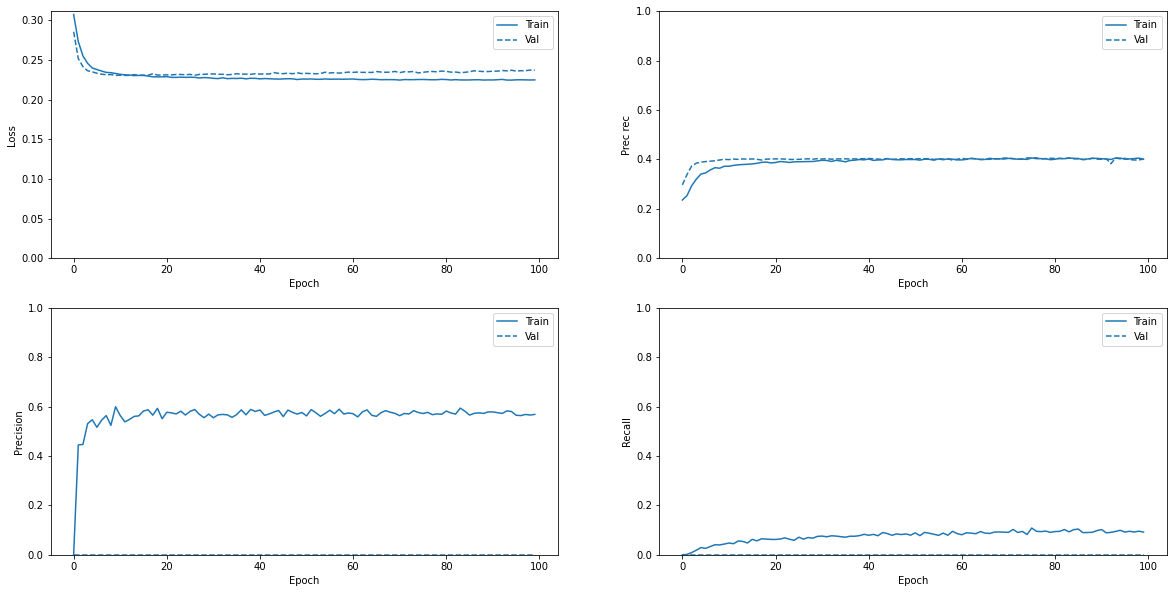

In [26]:
plot_metrics(baseline_history)

loss L  0.23651525378227234
tp L  0.0
fp L  0.0
tn L  21365.0
fn L  2307.0
accuracy L  0.9025430679321289
precision L  0.0
recall L  0.0
auc L  0.8712513446807861
prec_rec L  0.3804948329925537

No HIT Used Correct Prediction (True Negatives):  21365
No HIT Used Incorrectly Predicted as Used (False Positives):  0
HIT Used Missed (False Negatives):  2307
HIT Used Correct Prediction (True Positives):  0
Total HIT Used:  2307


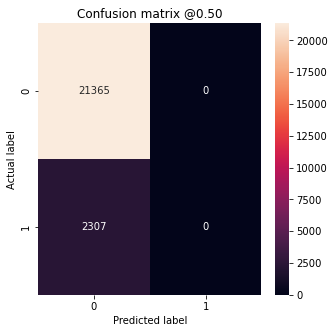

In [27]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

baseline_results = model.evaluate(test_features, test_labels, batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
    print(name, 'L ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

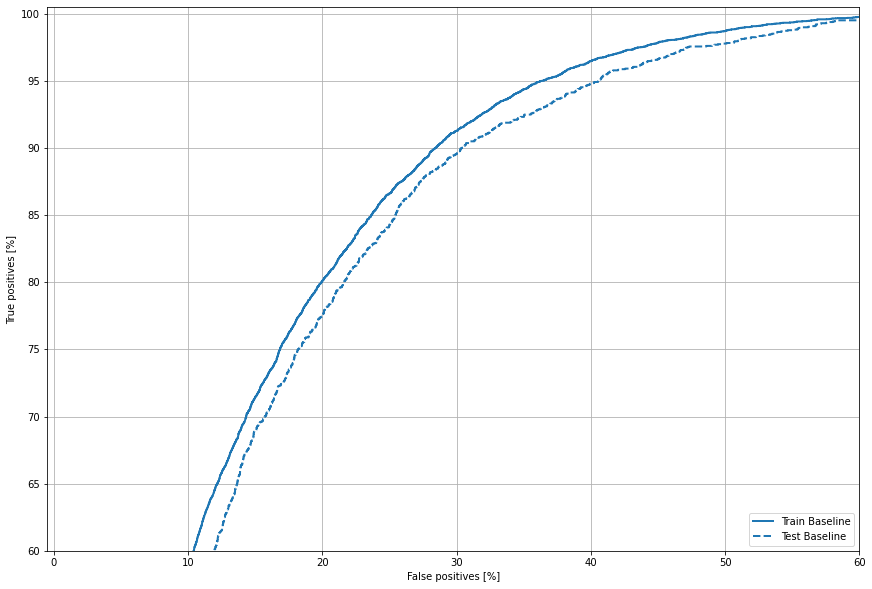

In [28]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right');

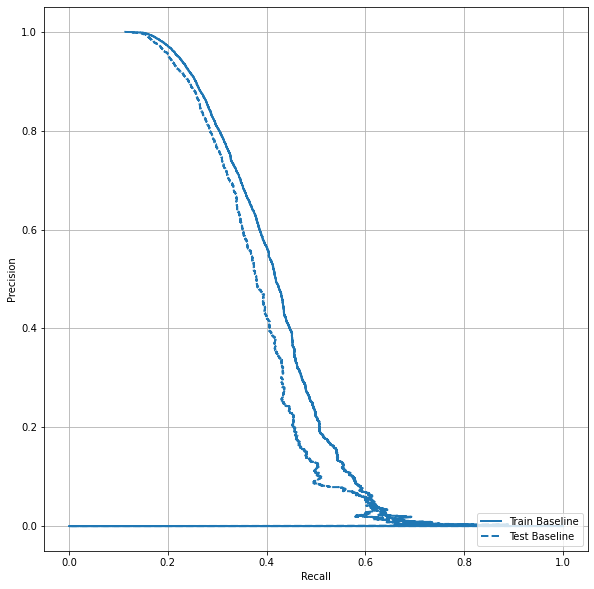

In [29]:
plot_prc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_prc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right');


## Add weights for each class and try

Change balance by increasing weight of used HIT, decreasing weight of not-used HIT.

In [30]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))


Weight for class 0: 0.55
Weight for class 1: 5.08


In [31]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    #callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight)


Epoch 1/100
76/76 [==============================] - 1s 13ms/step - loss: 0.9705 - tp: 219.0000 - fp: 1381.0000 - tn: 88299.0000 - fn: 9521.0000 - accuracy: 0.8903 - precision: 0.1369 - recall: 0.0225 - auc: 0.6159 - prec_rec: 0.1316 - val_loss: 0.4347 - val_tp: 10.0000 - val_fp: 34.0000 - val_tn: 17005.0000 - val_fn: 1888.0000 - val_accuracy: 0.8985 - val_precision: 0.2273 - val_recall: 0.0053 - val_auc: 0.7529 - val_prec_rec: 0.2069
Epoch 2/100
76/76 [==============================] - 0s 2ms/step - loss: 0.6384 - tp: 4025.0000 - fp: 17769.0000 - tn: 50546.0000 - fn: 3408.0000 - accuracy: 0.7204 - precision: 0.1847 - recall: 0.5415 - auc: 0.7065 - prec_rec: 0.1991 - val_loss: 0.4341 - val_tp: 1390.0000 - val_fp: 3560.0000 - val_tn: 13479.0000 - val_fn: 508.0000 - val_accuracy: 0.7852 - val_precision: 0.2808 - val_recall: 0.7323 - val_auc: 0.8459 - val_prec_rec: 0.3129
Epoch 3/100
76/76 [==============================] - 0s 3ms/step - loss: 0.5555 - tp: 5166.0000 - fp: 17894.0000 - tn:

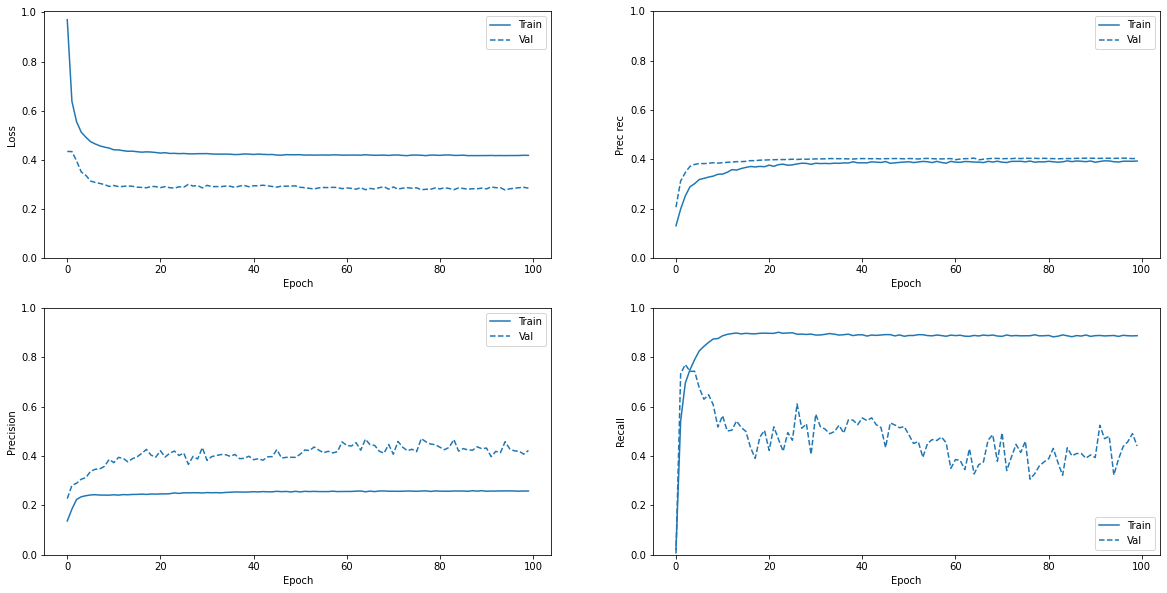

In [32]:
plot_metrics(weighted_history)


worse loss, better recall

loss :  0.28723642230033875
tp :  936.0
fp :  1387.0
tn :  19978.0
fn :  1371.0
accuracy :  0.883491039276123
precision :  0.4029272496700287
recall :  0.4057217240333557
auc :  0.8691246509552002
prec_rec :  0.38657259941101074

No HIT Used Correct Prediction (True Negatives):  19978
No HIT Used Incorrectly Predicted as Used (False Positives):  1387
HIT Used Missed (False Negatives):  1371
HIT Used Correct Prediction (True Positives):  936
Total HIT Used:  2307


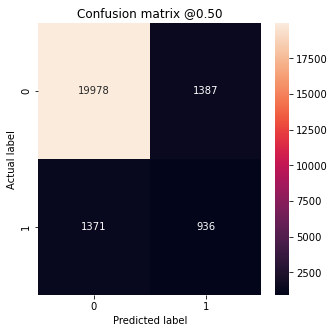

In [33]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)

weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_weighted)

way more true positives at cost of false positives

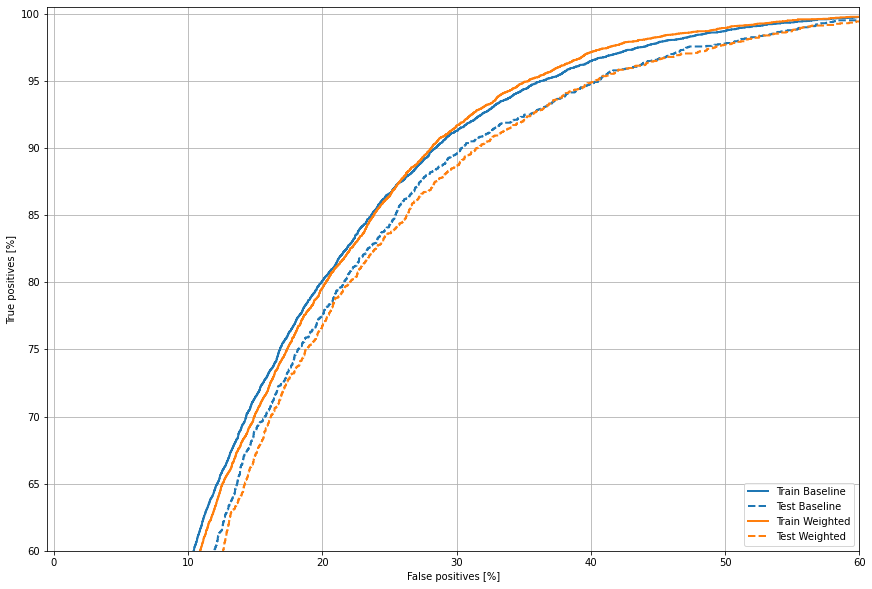

In [34]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right');


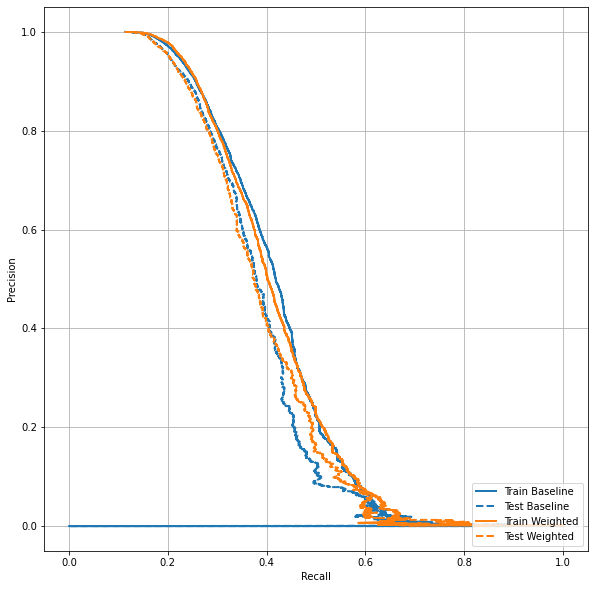

In [35]:
plot_prc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_prc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_prc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_prc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right');


### Try oversampling to upscale the used HIT data

make training data balanced by making 'artificial' used HIT samples

In [36]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]


In [37]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = pos_features[choices]
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(68315, 38)

In [38]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(136630, 38)

In [39]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

214.0

In [40]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

# val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
# val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

# resampled_history = resampled_model.fit(
#     resampled_ds,
#     epochs=EPOCHS,
#     steps_per_epoch=resampled_steps_per_epoch,
#     callbacks=[early_stopping],
#     validation_data=val_ds)

resampled_history = resampled_model.fit(
    resampled_features,
    resampled_labels,
    batch_size=BATCH_SIZE,
    epochs= EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    validation_data=(val_features, val_labels),
    #callbacks=[early_stopping],
    )

Epoch 1/100
214/214 [==============================] - 1s 6ms/step - loss: 0.5601 - tp: 80734.0000 - fp: 36905.0000 - tn: 91348.0000 - fn: 28315.0000 - accuracy: 0.7252 - precision: 0.6863 - recall: 0.7403 - auc: 0.8047 - prec_rec: 0.7357 - val_loss: 0.4283 - val_tp: 1668.0000 - val_fp: 4742.0000 - val_tn: 12297.0000 - val_fn: 230.0000 - val_accuracy: 0.7374 - val_precision: 0.2602 - val_recall: 0.8788 - val_auc: 0.8699 - val_prec_rec: 0.3757
Epoch 2/100
214/214 [==============================] - 0s 2ms/step - loss: 0.4498 - tp: 94681.0000 - fp: 32370.0000 - tn: 74214.0000 - fn: 11995.0000 - accuracy: 0.7920 - precision: 0.7452 - recall: 0.8876 - auc: 0.8564 - prec_rec: 0.8136 - val_loss: 0.4341 - val_tp: 1703.0000 - val_fp: 4902.0000 - val_tn: 12137.0000 - val_fn: 195.0000 - val_accuracy: 0.7308 - val_precision: 0.2578 - val_recall: 0.8973 - val_auc: 0.8753 - val_prec_rec: 0.3853
Epoch 3/100
214/214 [==============================] - 0s 2ms/step - loss: 0.4383 - tp: 95546.0000 - fp: 3

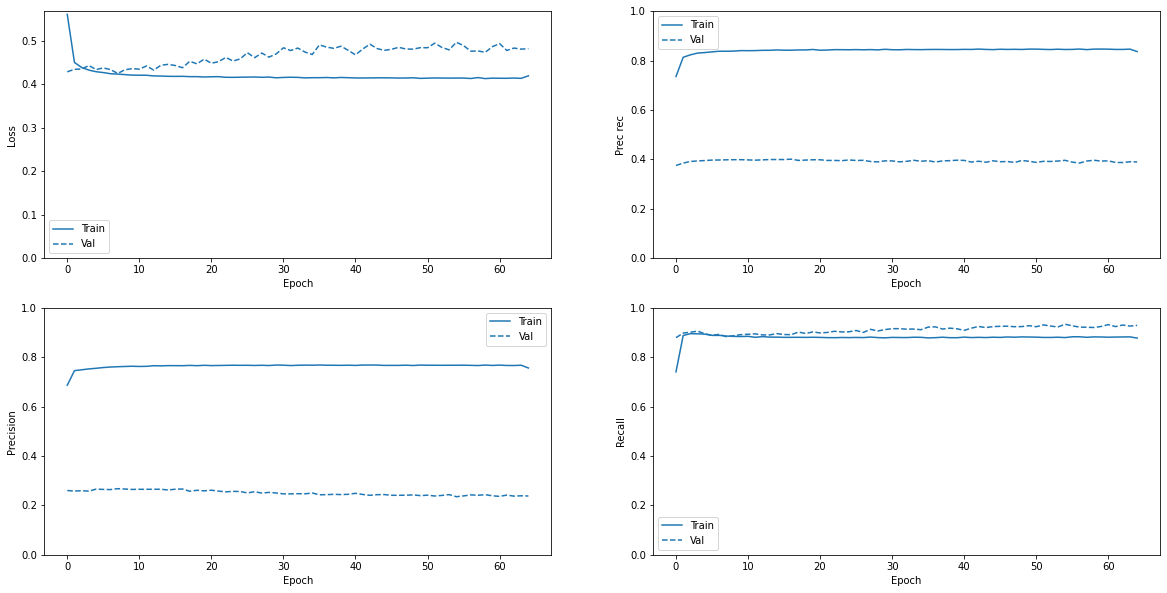

In [41]:
plot_metrics(resampled_history)


loss :  0.48461616039276123
tp :  2106.0
fp :  7142.0
tn :  14223.0
fn :  201.0
accuracy :  0.6898022890090942
precision :  0.22772490978240967
recall :  0.9128738641738892
auc :  0.8669872283935547
prec_rec :  0.37382593750953674

No HIT Used Correct Prediction (True Negatives):  14223
No HIT Used Incorrectly Predicted as Used (False Positives):  7142
HIT Used Missed (False Negatives):  201
HIT Used Correct Prediction (True Positives):  2106
Total HIT Used:  2307


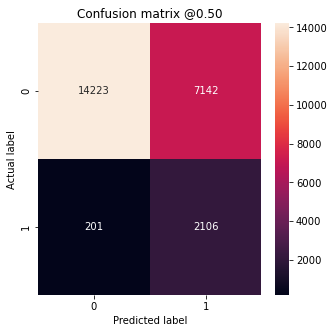

In [42]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)

resampled_results = resampled_model.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_resampled)


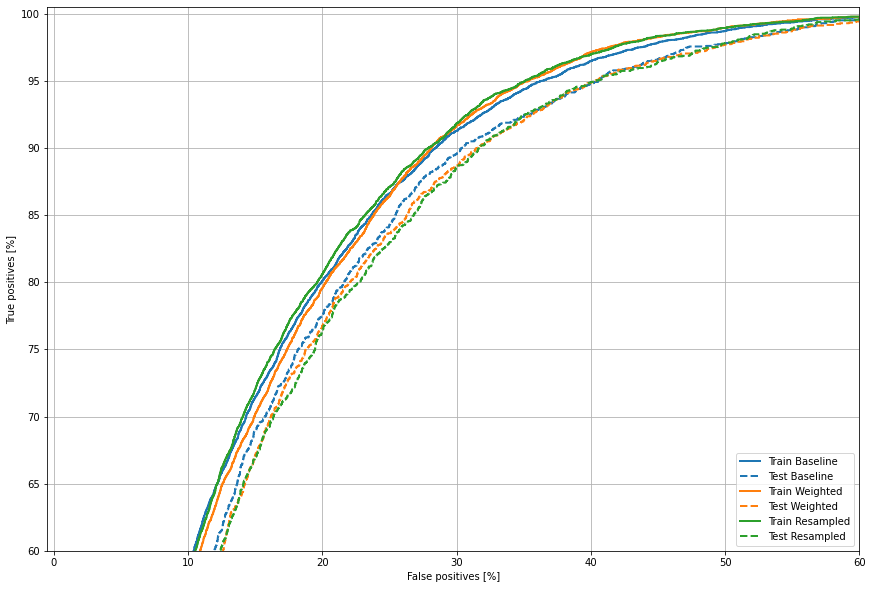

In [43]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_roc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right');


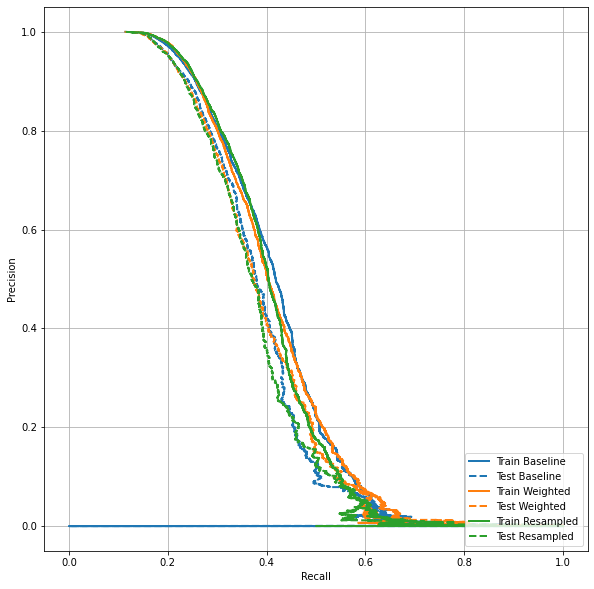

In [44]:
plot_prc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_prc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_prc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_prc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_prc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_prc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right');
